In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).filter(Measurement.date >= prev_year)
print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.head(10)

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.70
2016-08-23,2016-08-23,0.02
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15


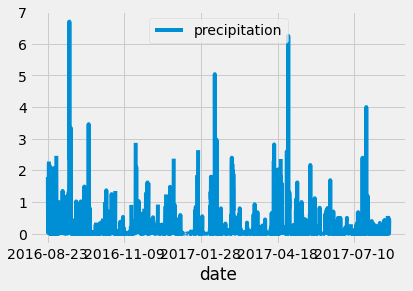

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

In [14]:
# Function to calculate the mean, minimum, maximum, standard deviation, and percentiles.
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [19]:
df = pd.DataFrame(results, columns=['tobs'])

In [20]:
df.head

<bound method NDFrame.head of      tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]>

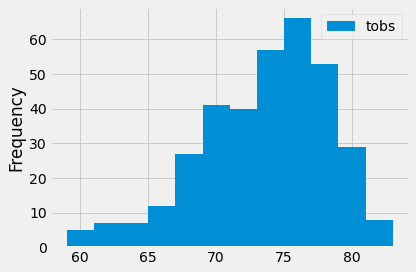

In [21]:
df.plot.hist(bins=12)
plt.tight_layout()

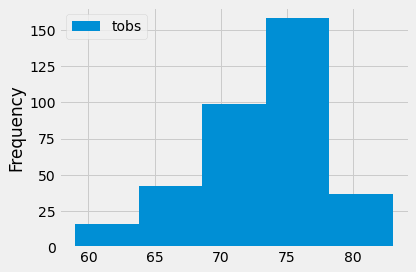

In [22]:
df.plot.hist(bins=5)
plt.tight_layout()

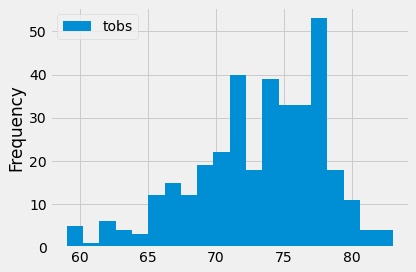

In [23]:
df.plot.hist(bins=20)
plt.tight_layout()

# Challenge

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [25]:
Base = automap_base()

In [26]:
Base.prepare(engine, reflect=True)

In [27]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
session = Session(engine)

In [29]:
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Measurement.station).all()
print(results)

[('2010-01-01', 0.08, 65.0, 'USC00519397'), ('2010-01-02', 0.0, 63.0, 'USC00519397'), ('2010-01-03', 0.0, 74.0, 'USC00519397'), ('2010-01-04', 0.0, 76.0, 'USC00519397'), ('2010-01-06', None, 73.0, 'USC00519397'), ('2010-01-07', 0.06, 70.0, 'USC00519397'), ('2010-01-08', 0.0, 64.0, 'USC00519397'), ('2010-01-09', 0.0, 68.0, 'USC00519397'), ('2010-01-10', 0.0, 73.0, 'USC00519397'), ('2010-01-11', 0.01, 64.0, 'USC00519397'), ('2010-01-12', 0.0, 61.0, 'USC00519397'), ('2010-01-14', 0.0, 66.0, 'USC00519397'), ('2010-01-15', 0.0, 65.0, 'USC00519397'), ('2010-01-16', 0.0, 68.0, 'USC00519397'), ('2010-01-17', 0.0, 64.0, 'USC00519397'), ('2010-01-18', 0.0, 72.0, 'USC00519397'), ('2010-01-19', 0.0, 66.0, 'USC00519397'), ('2010-01-20', 0.0, 66.0, 'USC00519397'), ('2010-01-21', 0.0, 69.0, 'USC00519397'), ('2010-01-22', 0.0, 67.0, 'USC00519397'), ('2010-01-23', 0.0, 67.0, 'USC00519397'), ('2010-01-24', 0.01, 71.0, 'USC00519397'), ('2010-01-25', 0.0, 67.0, 'USC00519397'), ('2010-01-26', 0.04, 76.0, '

In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column
weather_df = pd.DataFrame(results, columns=['date','precipitation', 'temperature', 'station'])                         
weather_df.set_index(weather_df['date'], inplace=True)
# Print list
print(weather_df.to_string(index=False))

       date  precipitation  temperature      station
 2010-01-01           0.08         65.0  USC00519397
 2010-01-02           0.00         63.0  USC00519397
 2010-01-03           0.00         74.0  USC00519397
 2010-01-04           0.00         76.0  USC00519397
 2010-01-06            NaN         73.0  USC00519397
 2010-01-07           0.06         70.0  USC00519397
 2010-01-08           0.00         64.0  USC00519397
 2010-01-09           0.00         68.0  USC00519397
 2010-01-10           0.00         73.0  USC00519397
 2010-01-11           0.01         64.0  USC00519397
 2010-01-12           0.00         61.0  USC00519397
 2010-01-14           0.00         66.0  USC00519397
 2010-01-15           0.00         65.0  USC00519397
 2010-01-16           0.00         68.0  USC00519397
 2010-01-17           0.00         64.0  USC00519397
 2010-01-18           0.00         72.0  USC00519397
 2010-01-19           0.00         66.0  USC00519397
 2010-01-20           0.00         66.0  USC00

In [31]:
# Filtering weather information for the month of June.
june_df = weather_df[pd.to_datetime(weather_df['date']).dt.month == 6]

In [32]:
del june_df['date']

In [33]:
# Statistical information for the month of June across all stations.
june_df.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [34]:
# Filtering weather information for the month of December.
december_df = weather_df[pd.to_datetime(weather_df['date']).dt.month == 12]

In [35]:
del december_df['date']

In [36]:
# Statistical information for the month of December across all stations.
december_df.describe()

,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [38]:
# Display the June and December dataframes side by side.
from IPython.display import display_html

june_df = june_df.describe()
december_df = december_df.describe()

june = june_df.style.set_table_attributes("style='display:inline'").set_caption('JUNE')
december = december_df.style.set_table_attributes("style='display:inline'").set_caption('DECEMBER')

display_html(june._repr_html_()+"\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0"+december._repr_html_(), raw=True)

,precipitation,temperature
count,8.000000,8.000000
mean,197.380261,269.025192
std,556.240445,578.771458
min,0.000000,3.257417
25%,0.015000,70.750000
50%,0.128180,74.972059
75%,1.359298,79.000000
max,1574.000000,1700.000000
,precipitation,temperature
count,8.000000,8.000000


In [ ]:
# Surfs_up

# Background

# An analysis of the climate was to be performed to strengthen the idea of opening a surfing
# and icecream shop in Oahu, Hawaii.  The weather data from 9 weather stations was used for the analysis.  The data was extracted from an SQLite database.  A query of the data from the last 12 months was used for the analysis.  The investor of the project would like to analyze the date from June and December to ensure that the investment is fool proof.

# Analysis

# Once connected to the SQLite database, the describe function along with the filter of the month
# of June and December was used to extract the statistical information.

# The analysis indicates that:

# the average temperature during December is slightly cooler than in June ( 75 F vs 71 F) but the minimum temperature recorded was much cooler than the minimum temperature recorded in June ( 64 F in June and 56 F in December)
# the maximum temperatures are not so different between the two months (85 F in June and 83 F in December)
# the average precipitation is slightly higher in December than in June but is of no concern at all (0.21 vs 0.13)

# Recommendations

#  Since there are only 9 weather Stations, it would benefit from further analysis of the statistical data
#  from each station.  Stations located in the mountains, windward side and leeward side may have differences.
#  Water temperatures are to be included in the analysis as the nature of the business (surfing) has an impact on this.
#  Location of the surf shop may be an important decision to make and the weather station closest
#  to it may be individually analyzed.
#  The weather date from a year of information may not be adequate to predict the general climate
#  of the island.  More years must be added to the analysis.
